<a href="https://colab.research.google.com/github/luarzs/ProjetoVendas/blob/main/Sistema_de_Recomenda%C3%A7%C3%A3o_IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Importando Dados das Músicas**

In [ ]:
from google.colab import files 
  
uploaded = files.upload()

Saving Dados_totais.csv to Dados_totais.csv
Saving data_by_genres.csv to data_by_genres.csv
Saving data_by_year.csv to data_by_year.csv


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
dados = pd.read_csv('Dados_totais.csv')
dados_generos = pd.read_csv('data_by_genres.csv')
dados_anos = pd.read_csv('data_by_year.csv')

In [ ]:
dados = dados.drop(["explicit", "key", "mode"], axis=1)
dados.head(5)

,valence,year,acousticness,artists,danceability,duration_ms,energy,id,instrumentalness,liveness,loudness,name,popularity,speechiness,tempo,artists_song
0,0.285,2000,0.00239,Coldplay,0.429,266773,0.661,3AJwUDP919kvQ9QcozQPxg,0.000121,0.2340,-7.227,Yellow,84,0.0281,173.372,Coldplay - Yellow
1,0.613,2000,0.14300,OutKast,0.843,270507,0.806,0I3q5fE6wg7LIfHGngUTnV,0.000000,0.0771,-5.946,Ms. Jackson,80,0.2690,94.948,OutKast - Ms. Jackson
2,0.400,2000,0.00958,Linkin Park,0.556,216880,0.864,60a0Rd6pjrkxjPbaKzXjfq,0.000000,0.2090,-5.870,In the End,84,0.0584,105.143,Linkin Park - In the End
3,0.543,2000,0.00664,3 Doors Down,0.545,233933,0.865,6ZOBP3NvffbU4SZcrnt1k6,0.000011,0.1680,-5.708,Kryptonite,78,0.0286,99.009,3 Doors Down - Kryptonite
4,0.760,2000,0.03020,Eminem,0.949,284200,0.661,3yfqSUWxFvZELEM4PmlwIR,0.000000,0.0454,-4.244,The Real Slim Shady,80,0.0572,104.504,Eminem - The Real Slim Shady


In [ ]:
dados_generos = dados_generos.drop(["key", "mode"], axis=1)
dados_generos.head(5)

,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity
0,21st century classical,0.979333,0.162883,1.602977e+05,0.071317,0.606834,0.361600,-31.514333,0.040567,75.336500,0.103783,27.833333
1,432hz,0.494780,0.299333,1.048887e+06,0.450678,0.477762,0.131000,-16.854000,0.076817,120.285667,0.221750,52.500000
2,8-bit,0.762000,0.712000,1.151770e+05,0.818000,0.876000,0.126000,-9.180000,0.047000,133.444000,0.975000,48.000000
3,[],0.651417,0.529093,2.328809e+05,0.419146,0.205309,0.218696,-12.288965,0.107872,112.857352,0.513604,20.859882
4,a cappella,0.676557,0.538961,1.906285e+05,0.316434,0.003003,0.172254,-12.479387,0.082851,112.110362,0.448249,45.820071


In [ ]:
dados_anos = dados_anos.drop(["key", "mode"], axis=1)

In [ ]:
dados_anos = dados_anos[dados_anos["year"]>=2000]

In [ ]:
dados_anos.reset_index()
dados_anos.head(5)

,year,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity
79,2000,0.289323,0.590918,242724.642638,0.625413,0.101168,0.197686,-8.247766,0.089205,118.999323,0.559475,46.684049
80,2001,0.286842,0.583318,240307.796010,0.626986,0.107214,0.187026,-8.305095,0.089182,117.765399,0.541479,48.750125
81,2002,0.282624,0.576160,239503.283000,0.641270,0.088048,0.193911,-7.686640,0.084308,119.239738,0.542397,48.655500
82,2003,0.256471,0.575763,244670.575230,0.660165,0.083049,0.196976,-7.485545,0.093926,120.914622,0.530504,48.626407
83,2004,0.280559,0.567680,237378.708037,0.648868,0.077934,0.202199,-7.601655,0.094239,121.290346,0.524489,49.273143


### **Fazendo a Análise Gráfica**

In [ ]:
import plotly.graph_objects as go
import plotly.express as px

In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=dados_anos['year'], y=dados_anos['acousticness'], name='Acousticness'))
fig.add_trace(go.Scatter(x=dados_anos['year'], y=dados_anos['valence'], name='Valence'))
fig.add_trace(go.Scatter(x=dados_anos['year'], y=dados_anos['danceability'], name='Danceability'))
fig.add_trace(go.Scatter(x=dados_anos['year'], y=dados_anos['energy'], name='Energy'))
fig.add_trace(go.Scatter(x=dados_anos['year'], y=dados_anos['instrumentalness'], name='Instrumentalness'))
fig.add_trace(go.Scatter(x=dados_anos['year'], y=dados_anos['liveness'], name='Liveness'))
fig.add_trace(go.Scatter(x=dados_anos['year'], y=dados_anos['speechiness'], name='Speechiness'))

fig.show()

### **Clusterização por Gênero**

In [ ]:
dados_generos1 = dados_generos.drop('genres', axis=1)

In [ ]:
dados_generos1.head(2)

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity
0,0.979333,0.162883,1.602977e+05,0.071317,0.606834,0.3616,-31.514333,0.040567,75.336500,0.103783,27.833333
1,0.494780,0.299333,1.048887e+06,0.450678,0.477762,0.1310,-16.854000,0.076817,120.285667,0.221750,52.500000


In [ ]:
from sklearn.pipeline import Pipeline # Gerencia os dados de ML
from sklearn.preprocessing import StandardScaler # Padroniza os Dados
from sklearn.decomposition import PCA # Reduz as colunas no máximo possivel

In [ ]:
SEED = 1224
np.random.seed(1224)

pca_pipeline = Pipeline([('scaler', StandardScaler()), ('PCA', PCA(n_components=2, random_state=SEED))])

In [ ]:
genre_embedding_pca = pca_pipeline.fit_transform(dados_generos1)

projection = pd.DataFrame(columns=['x', 'y'], data=genre_embedding_pca)

In [ ]:
projection

,x,y
0,5.910268,-0.011146
1,2.787093,4.498483
2,-0.757538,-1.258495
3,1.020521,-0.931690
4,0.753911,-0.999861
...,...,...
2968,-0.475136,-0.017126
2969,-3.026756,-1.304983
2970,-0.832511,-1.089726
2971,1.774790,-3.695233


### **Usando K-Means**

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmeans_pca = KMeans(n_clusters=5, verbose=True, random_state=SEED)

kmeans_pca.fit(projection)

dados_generos['cluster_pca'] = kmeans_pca.predict(projection)
projection['cluster_pca'] = kmeans_pca.predict(projection)

Initialization complete
Iteration 0, inertia 4523.567815543693
Iteration 1, inertia 3668.985552156024
Iteration 2, inertia 3624.7309257118195
Iteration 3, inertia 3602.495813758819
Iteration 4, inertia 3588.060791240484
Iteration 5, inertia 3575.439570259302
Iteration 6, inertia 3566.376131163019
Iteration 7, inertia 3562.5917284574925
Iteration 8, inertia 3560.314467700935
Iteration 9, inertia 3558.885495152648
Iteration 10, inertia 3558.002748934052
Iteration 11, inertia 3557.729554775488
Converged at iteration 11: center shift 9.319981044865446e-05 within tolerance 0.00027098868470996494.
Initialization complete
Iteration 0, inertia 3650.5166847646506
Iteration 1, inertia 3552.891536564817
Iteration 2, inertia 3528.9425421232254
Iteration 3, inertia 3518.849132048711
Iteration 4, inertia 3512.6717916139787
Iteration 5, inertia 3509.174107824746
Iteration 6, inertia 3506.388333551375
Iteration 7, inertia 3505.0910743094114
Iteration 8, inertia 3504.6465117384932
Converged at iteratio

In [ ]:
projection['generos'] = dados_generos['genres']

In [ ]:
projection

,x,y,cluster_pca,generos
0,5.910268,-0.011146,3,21st century classical
1,2.787093,4.498483,3,432hz
2,-0.757538,-1.258495,4,8-bit
3,1.020521,-0.931690,1,[]
4,0.753911,-0.999861,1,a cappella
...,...,...,...,...
2968,-0.475136,-0.017126,2,zolo
2969,-3.026756,-1.304983,4,zouglou
2970,-0.832511,-1.089726,4,zouk
2971,1.774790,-3.695233,1,zurich indie


### **Gráficos da Cluster**

In [ ]:
fig = px.scatter(projection, x='x', y='y', color='cluster_pca', hover_data=['x', 'y', 'generos'])

fig.show()

### **Clusterização por Música**

In [ ]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(dtype=int)

colunas_ohe = ohe.fit_transform(dados[['artists']]).toarray()

dados2 = dados.drop('artists', axis=1)

dados_musicas_dummies = pd.concat([dados2, pd.DataFrame(colunas_ohe, columns=ohe.get_feature_names_out(['artists']))], axis=1)
dados_musicas_dummies

,valence,year,acousticness,danceability,duration_ms,energy,id,instrumentalness,liveness,loudness,...,artists_Zara Larsson,artists_Zedd,artists_alt-J,artists_blackbear,artists_blink-182,artists_deadmau5,artists_for KING & COUNTRY,artists_fun.,artists_girl in red,artists_iann dior
0,0.285,2000,0.00239,0.429,266773,0.661,3AJwUDP919kvQ9QcozQPxg,0.000121,0.2340,-7.227,...,0,0,0,0,0,0,0,0,0,0
1,0.613,2000,0.14300,0.843,270507,0.806,0I3q5fE6wg7LIfHGngUTnV,0.000000,0.0771,-5.946,...,0,0,0,0,0,0,0,0,0,0
2,0.400,2000,0.00958,0.556,216880,0.864,60a0Rd6pjrkxjPbaKzXjfq,0.000000,0.2090,-5.870,...,0,0,0,0,0,0,0,0,0,0
3,0.543,2000,0.00664,0.545,233933,0.865,6ZOBP3NvffbU4SZcrnt1k6,0.000011,0.1680,-5.708,...,0,0,0,0,0,0,0,0,0,0
4,0.760,2000,0.03020,0.949,284200,0.661,3yfqSUWxFvZELEM4PmlwIR,0.000000,0.0454,-4.244,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20306,0.187,2020,0.57400,0.445,176250,0.330,0PUkanqCGTb6qseXPKOw1F,0.000000,0.1020,-8.121,...,0,0,0,0,0,0,0,0,0,0
20307,0.240,2020,0.81500,0.467,179188,0.429,6Iw6fQVKZi0fWtEQBrTFcP,0.000052,0.1770,-8.689,...,0,0,0,0,0,0,0,0,0,0
20308,0.466,2020,0.31000,0.562,253613,0.686,308prODCCD0O660tIktbUi,0.022500,0.1250,-8.480,...,0,0,0,0,0,0,0,0,0,0
20309,0.522,2020,0.20400,0.598,230600,0.472,2f8y4CuG57UJEmkG3ujd0D,0.000015,0.1080,-10.991,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
pca_pipeline = Pipeline([('scaler', StandardScaler()), ('PCA', PCA(n_components=0.7, random_state=SEED))])

music_embedding_pca = pca_pipeline.fit_transform(dados_musicas_dummies.drop(['id', 'name', 'artists_song'], axis=1))

projection_m = pd.DataFrame(data=music_embedding_pca)

In [ ]:
kmeans_pca_pipeline = KMeans(n_clusters=50, verbose=False, random_state=SEED)

kmeans_pca_pipeline.fit(projection_m)

dados['cluster_pca'] = kmeans_pca_pipeline.predict(projection_m)
projection_m['cluster_pca'] = kmeans_pca_pipeline.predict(projection_m)

In [ ]:
projection_m['artists'] = dados['artists']
projection_m['song'] = dados['artists_song']

In [ ]:
projection_m

,0,1,2,3,4,5,6,7,8,9,...,605,606,607,608,609,610,611,cluster_pca,artists,song
0,0.174796,0.731252,2.186797,-0.767192,0.594847,0.315968,-0.412322,-0.479171,-2.700668,2.109956,...,-0.009111,0.005154,-0.034027,-0.032617,-2.448503e-12,5.916867e-12,3.121908e-12,41,Coldplay,Coldplay - Yellow
1,-1.358420,0.052935,-1.789973,1.938444,0.403606,1.023898,-1.172118,0.821698,-1.716897,0.252498,...,-0.031986,0.029708,-0.016322,-0.030234,1.249715e-13,-1.457579e-12,-2.040535e-13,41,OutKast,OutKast - Ms. Jackson
2,-0.972077,0.658094,0.757500,-0.277350,-0.400393,0.402941,1.292960,1.839192,-1.562236,1.410677,...,0.017097,0.017361,-0.010979,-0.012781,-1.126295e-12,5.280977e-13,4.085243e-13,41,Linkin Park,Linkin Park - In the End
3,-0.926464,1.292091,0.398499,-0.997738,0.202219,0.620859,-0.527689,1.135529,-1.343893,1.020964,...,0.089337,0.164777,-0.064148,-0.040911,1.258083e-12,4.310193e-12,-4.043356e-13,41,3 Doors Down,3 Doors Down - Kryptonite
4,-1.710077,-0.383502,-1.258562,1.346428,1.223591,1.744579,0.094311,0.479412,-2.125376,0.389565,...,-0.011937,-0.004081,-0.017478,-0.010033,-2.516703e-13,1.619560e-12,3.676579e-13,41,Eminem,Eminem - The Real Slim Shady
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20306,1.346699,-2.775889,0.986755,-1.704967,0.103935,-0.726582,0.253808,0.520234,-0.064513,0.204971,...,-0.235355,-0.054256,0.016922,-0.125947,-1.236427e-11,1.397844e-11,1.774074e-11,15,Bazzi,Bazzi - I Don't Think I'm Okay
20307,1.269387,-2.444619,0.971408,-0.115303,-0.719597,-1.823579,-0.545186,-1.475719,-0.338390,0.272129,...,-0.183026,0.074605,0.005622,0.000054,-1.258064e-11,2.210559e-11,-6.425509e-12,15,Bryson Tiller,Bryson Tiller - Timeless Interlude
20308,0.781916,-1.164865,0.705256,-0.947160,1.145828,-0.472667,-0.356604,0.972512,0.900317,-0.674016,...,-0.033420,-0.157564,0.213849,-0.065180,2.362917e-11,-9.586614e-12,9.207036e-12,15,Fleet Foxes,Fleet Foxes - Sunblind
20309,0.002454,-3.056407,-0.272934,1.436355,-0.604453,0.251492,-1.361710,-0.633245,0.280076,0.521145,...,-0.784640,0.080684,0.038379,0.108493,-2.187180e-12,5.916833e-11,-8.516342e-12,15,Gunna,Gunna - NASTY GIRL / ON CAMERA


In [ ]:
fig = px.scatter(projection_m, x=0, y=1, color='cluster_pca', hover_data=[0, 1, 'song'])

fig.show()

### **Recomendação**

In [ ]:
nome_musica = 'One Direction - Story of My Life'

In [ ]:
from sklearn.metrics.pairwise import euclidean_distances

cluster = list(projection_m[projection_m['song']== nome_musica]['cluster_pca'])[0]

musicas_recomendadas = projection_m[projection_m['cluster_pca']==cluster][[0, 1, 'song']]

x_musica = list(projection_m[projection_m['song']== nome_musica][0])[0]
y_musica = list(projection_m[projection_m['song']== nome_musica][1])[0]

# Distâncias Euclidianas
distancias = euclidean_distances(musicas_recomendadas[[0, 1]], [[x_musica, y_musica]])

musicas_recomendadas['id'] = dados['id']
musicas_recomendadas['distancias']= distancias

recomendada = musicas_recomendadas.sort_values('distancias').head(10)
recomendada

,0,1,song,id,distancias
1846,-0.459907,-1.493686,One Direction - Story of My Life,4nVBt6MZDDP6tRVdQTgxJg,0.000000
15003,-0.459019,-1.498610,Upchurch - Down in the Holler (feat. Justin Ad...,4I7PLio2du8rHFfw8vca4d,0.005003
18343,-0.458992,-1.503317,Gerardo Ortiz - Mujer De Pierda,4US4uNDUynAor7UMaQHaxv,0.009674
1887,-0.487533,-1.489773,Twenty One Pilots - Car Radio,5cbpoIu3YjoOwbBDGUEp3P,0.027902
7044,-0.435978,-1.522400,One Direction - Walking in the Wind,1ZycJRpLOazlLcoFGxGROO,0.037378
9304,-0.458760,-1.531460,Rae Sremmurd - Look Alive,2IGr3q6ljcpLvHDFLtI0yW,0.037791
4998,-0.501297,-1.496442,G-Eazy - Him & I (with Halsey),5k38wzpLb15YgncyWdTZE4,0.041481
6216,-0.455948,-1.535776,Cartel De Santa - Hey Si Me Ven,1dndIoArEd9c27oqi4Wqmd,0.042275
11246,-0.408357,-1.504730,Kygo - Stay (feat. Maty Noyes),7gBj0VgcuAgkXkiRRYvSmK,0.052720
964,-0.519488,-1.503459,Mother Mother - Verbatim,266Vb7ItE3o1q8HdJ9QOvn,0.060377


In [ ]:
!pip install spotipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.1 MB/s 
     |████████████████████████████████| 140 kB 67.4 MB/s 
     |████████████████████████████████| 236 kB 86.5 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [ ]:
import spotipy

from spotipy.oauth2 import SpotifyOAuth
from spotipy.oauth2 import SpotifyClientCredentials

In [ ]:
scope = "user-library-read playlist-modify-private"
OAuth = SpotifyOAuth(
        scope=scope,         
        redirect_uri='http://localhost:5000/callback',
        client_id = '37bcc80d82d04ddb96c0ff0b6caad3b1',
        client_secret = '268011ed524f4f48885d95fc38912e1b')

In [ ]:
client_credentials_manager = SpotifyClientCredentials(client_id = '37bcc80d82d04ddb96c0ff0b6caad3b1',client_secret = '268011ed524f4f48885d95fc38912e1b')
sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)

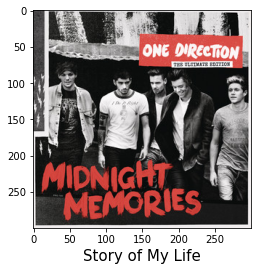

In [ ]:
import matplotlib.pyplot as plt
from skimage import io

# ID
nome_musica = 'One Direction - Story of My Life'
id = dados[dados['artists_song']== nome_musica]['id'].iloc[0]

# Requisição da API
track = sp.track(id)
url = track["album"]["images"][1]["url"]
name = track["name"]

# Pegando a Imagem
image = io.imread(url)
plt.imshow(image)
plt.xlabel(name, fontsize = 15)
plt.show()

In [ ]:
def recommend_id(playlist_id): 
  url = []
  name = []
  for i in playlist_id:
    track = sp.track(i)
    url.append(track["album"]["images"][1]["url"])
    name.append(track["name"])
  return name, url

In [ ]:
name, url = recommend_id(recomendada['id'])

In [ ]:
def visualize_songs(name, url):
  
  plt.figure(figsize=(15,10))
  columns = 5

  for i, u in enumerate(url):
      # Define o ax como o Subplot, a divisão que retorna inteiro do número urls pelas colunas + 1 (6)
      ax = plt.subplot(len(url) // columns + 1, columns, i + 1)

      # Lendo a imagem com o Scikit Image
      image = io.imread(u)

      # Mostra a imagem
      plt.imshow(image)

      # Eixo Y invisível
      ax.get_yaxis().set_visible(False)

      # Xticks define o local que vamos trocar os rótulos do eixo x
      plt.xticks(color = 'w', fontsize = 0.1)

      # Yticks define o local que vamos trocar os rótulos do eixo y
      plt.yticks(color = 'w', fontsize = 0.1)

      # Colocando o nome da música no eixo x
      plt.xlabel(name[i], fontsize = 8)

      # Faz com que todos os parâmetros se encaixem no tamanho da imagem definido
      plt.tight_layout(h_pad=0.7, w_pad=0) #h = height - w = width

      # Ajusta os parâmetros de layout da imagem.
      # wspace = A largura do preenchimento entre subparcelas/frações dos eixos.
      # hspace = A altura do preenchimento entre subparcelas/frações dos eixos.
      plt.subplots_adjust(wspace=None, hspace=None)

      # Remove os ticks - deixando o nome da música.
      plt.tick_params(bottom = False)

      # Tirar a grade da imagem.
      plt.grid(visible=None)
      
  plt.show()

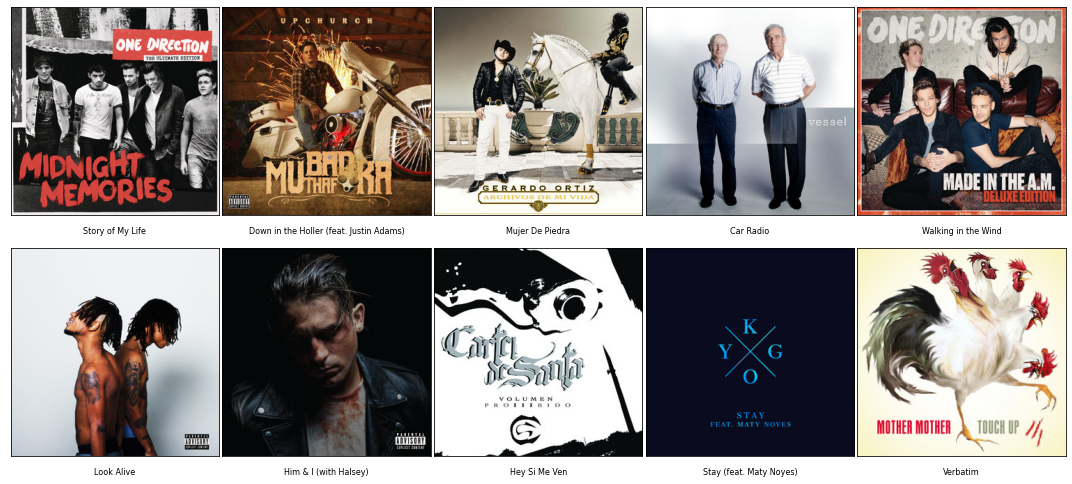

In [ ]:
visualize_songs(name, url)

### **Projeto Final**

In [ ]:
def recomendador(nome_musica):

# Calculando as distâncias
  cluster = list(projection_m[projection_m['song']== nome_musica]['cluster_pca'])[0]
  musicas_recomendadas = projection_m[projection_m['cluster_pca']== cluster][[0, 1, 'song']]
  x_musica = list(projection_m[projection_m['song']== nome_musica][0])[0]
  y_musica = list(projection_m[projection_m['song']== nome_musica][1])[0]
  distancias = euclidean_distances(musicas_recomendadas[[0, 1]], [[x_musica, y_musica]])
  musicas_recomendadas['id'] = dados['id']
  musicas_recomendadas['distancias'] = distancias
  recomendada = musicas_recomendadas.sort_values('distancias').head(10)

# Acessando os dados de cada música com a biblioteca Spotipy (nome e imagem)
  playlist_id = recomendada['id']

  url = []
  name = []
  for i in playlist_id:
      track = sp.track(i)
      url.append(track["album"]["images"][1]["url"])
      name.append(track["name"])

# Colocando as Imagens
  plt.figure(figsize=(15,10))
  columns = 5
  for i, u in enumerate(url):
      ax = plt.subplot(len(url) // columns + 1, columns, i + 1)
      image = io.imread(u)
      plt.imshow(image)
      ax.get_yaxis().set_visible(False)
      plt.xticks(color = 'w', fontsize = 0.1)
      plt.yticks(color = 'w', fontsize = 0.1)
      plt.xlabel(name[i], fontsize = 10)
      plt.tight_layout(h_pad=0.7, w_pad=0)
      plt.subplots_adjust(wspace=None, hspace=None)
      plt.grid(visible=None)
      plt.tick_params(bottom = False)
  plt.show()

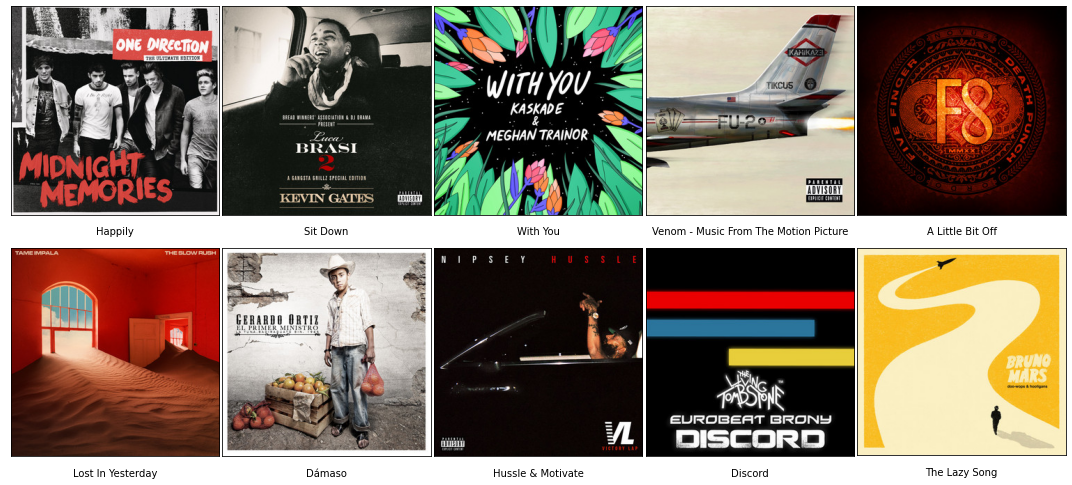

In [ ]:
recomendador('One Direction - Happily')